When you apply the CNOT gate on the state $|00\rangle$ what you will get out is the state $|00\rangle$, as the CNOT gate logically does the following:

$$
CNOT |00\rangle = |00\rangle,
$$

$$
CNOT |01\rangle = |01\rangle, 
$$

$$
CNOT |10\rangle = |11\rangle, 
$$

$$
CNOT |11\rangle = |10\rangle
$$

where 

$$
\left\{ |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \right\}
$$

represents the computational basis. Here we are taking the first qubit as the controlled qubit, and the second qubit as the target qubit. That is, if the first (Controlled) qubit is in the state $|1\rangle$ then you apply the $X$ (NOT) gate to the second (Target) qubit, otherwise you do nothing. Thus, in this setting the CNOT gate has matrix representation (in the computational basis) as:

$$
CNOT =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$

so that is what you implement when you run the circuit.

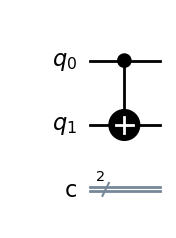

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Create a quantum register with 2 qubits and name it 'q'
qreg_q = QuantumRegister(2, 'q')

# Create a classical register with 2 classical bits and name it 'c'
creg_c = ClassicalRegister(2, 'c')

# Initialize a quantum circuit with the defined quantum and classical registers
circuit = QuantumCircuit(qreg_q, creg_c)

# Apply a CNOT (Controlled-NOT) gate with qreg_q[0] as the control qubit
# and qreg_q[1] as the target qubit. This flips the target qubit if the control is |1⟩.
circuit.cx(qreg_q[0], qreg_q[1])

# Draw the quantum circuit using the 'mpl' (matplotlib) backend
# Style: 'bw' (black and white), without barriers, and scale factor set to 1
circuit.draw('mpl', style={'name': 'bw'}, plot_barriers=False, scale=1)

As always, all states in a quantum computer start at the state 

$$
|00\cdots 0\rangle .
$$ 

Hence, this means that for our circuit above $q_0 = |0\rangle$ and $q_1 = |0\rangle$, so the starting state is

$$
|00\rangle = |0\rangle \otimes |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
$$

Notice that

$$
CNOT |00\rangle =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
=
\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
= |00\rangle
$$

The input is the state of $|00\rangle$ and the output is also $|00\rangle$. Note that: `circuit.cx(qreg_q[0], qreg_q[1])` indicates that the controlled qubit is in the quantum register `qreg_q[0]` and it will act on the target qubit which is in the quantum register `qreg_q[1]`. And this can be changed. That is, you can make the qubit in the quantum register `qreg_q[1]` as your controlled qubit and the qubit in the quantum register `qreg_q[0]` as your target qubit by simply switching the 5th line of the code to:  `circuit.cx(qreg_q[1], qreg_q[0])`. The circuit will look like:

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer  
from qiskit_aer import AerSimulator

# Define a quantum register with 2 qubits
qreg_q = QuantumRegister(2, 'q')
# Define a classical register with 2 classical bits (for measurement results)
creg_c = ClassicalRegister(2, 'c')

In [3]:
# Initialize a quantum circuit with the quantum and classical registers
circuit = QuantumCircuit(qreg_q, creg_c)
print(circuit)

     
q_0: 
     
q_1: 
     
c: 2/
     


Note that the $X$ gate here is to put the qubit $q_0$ from the state $|0\rangle$ to $|1\rangle$. That is, we are making the input state $|10\rangle$. The output state now would be $|11\rangle$ as the controlled qubit is now in the state $|1\rangle$, so it will act on the target qubit by applying the $X$ (NOT) gate.

In [4]:
# Apply an X (NOT) gate to qreg_q[0], flipping it from |0⟩ to |1⟩
circuit.x(qreg_q[0])
print(circuit)

     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
c: 2/═════
          


In [5]:
# Apply a CNOT gate with qreg_q[0] as control and qreg_q[1] as target
circuit.cx(qreg_q[0], qreg_q[1])
print(circuit)

     ┌───┐     
q_0: ┤ X ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               


In [6]:
# Measure both qubits and store results in classical bits
circuit.measure(qreg_q[0], creg_c[0])
print(circuit)

     ┌───┐     ┌─┐
q_0: ┤ X ├──■──┤M├
     └───┘┌─┴─┐└╥┘
q_1: ─────┤ X ├─╫─
          └───┘ ║ 
c: 2/═══════════╩═
                0 


In [7]:
# Measure both qubits and store results in classical bits
circuit.measure(qreg_q[1], creg_c[1])
print(circuit)

     ┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


# Theory and Explanation of the Code

This quantum circuit demonstrates the action of the X (NOT) gate and the CNOT (Controlled-NOT) gate on a 2-qubit system, followed by measurement.

---

## Initial State of the Qubits

A quantum computer initializes all qubits in the $|0\rangle$ state by default. Since we are using two qubits, the initial state is:

$$
|00\rangle = |0\rangle \otimes |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
$$

---

## Applying the X (NOT) Gate on Qubit $q_0$

The X gate (Pauli-X) is the quantum equivalent of the classical NOT gate. It flips $|0\rangle$ to $|1\rangle$ and vice versa. The matrix representation is:

$$
X =
\begin{pmatrix} 
0 & 1 \\ 
1 & 0 
\end{pmatrix}
$$

Applying **$X$** to qubit $q_0$ transforms the state:

$$
X|0\rangle = |1\rangle
$$

So, the **new state** of the system is:

$$
|10\rangle = |1\rangle \otimes |0\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}
$$

---

## Applying the CNOT Gate

The CNOT (Controlled-NOT) Gate flips the target qubit ($q_1$) if and only if the control qubit ($q_0$) is in the $|1\rangle$ state. The CNOT matrix representation for two qubits is:

$$
CNOT =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$

Since our current state before applying CNOT is:

$$
|10\rangle = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}
$$

Multiplying the **CNOT matrix** by this state:

$$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}
=
\begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}
$$

Since **CNOT only affects the target qubit when the control is $|1\rangle$**, the result is:

$$
|11\rangle = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}
$$

Thus, after applying the **CNOT gate**, our **final quantum state is $|11\rangle$**.

---

## **4. Measurement of the Qubits**
At the end of the circuit, both qubits are **measured**. This collapses the quantum state into a classical bitstring.

$$
\text{Measurement: } |11\rangle \rightarrow \text{ Classical Output } "11"
$$

The measurement results are stored in the classical register:

- `creg_c[0]` stores the measurement of `qreg_q[0]`
- `creg_c[1]` stores the measurement of `qreg_q[1]`

Since there is no superposition in this circuit, the output is always **"11"** with **100% probability**.

---

## **5. Running the Circuit on a Simulator**
1. **`AerSimulator()`**: Creates a quantum simulator that can execute the circuit.
2. **`transpile(circuit, simulator)`**: Optimizes the circuit for execution.
3. **`simulator.run(compiled_circuit).result()`**: Runs the quantum circuit and retrieves the results.
4. **`result.get_counts()`**: Retrieves the number of occurrences of each measurement result.

Since the final state is always **$|11\rangle$**, the histogram will show:

```
{"11": 1024  # (If shots=1024)}
```

This means that **every time the circuit is executed, the result is always "11"**, confirming our calculations.

---

## **Final Summary**
1. **Initial state**: $|00\rangle$  
2. **Apply X gate** on `q_0`: State changes to **$|10\rangle$**  
3. **Apply CNOT gate** (control = `q_0`, target = `q_1`): State changes to **$|11\rangle$**  
4. **Measurement** collapses the state to `"11"` in classical bits  
5. **Simulator executes the circuit** and confirms `"11"` is the only possible result  

### **Expected Measurement Output:**
- **100% probability of measuring "11"**  
- **No other outcomes appear in the histogram**

This circuit is a simple example of **quantum entanglement**, where one qubit's value controls another qubit's transformation.

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer  
from qiskit_aer import AerSimulator

# Define a quantum register with 2 qubits
qreg_q = QuantumRegister(2, 'q')
# Define a classical register with 2 classical bits (for measurement results)
creg_c = ClassicalRegister(2, 'c')
# Initialize a quantum circuit with the quantum and classical registers
circuit = QuantumCircuit(qreg_q, creg_c)
# Apply an X (NOT) gate to qreg_q[0], flipping it from |0⟩ to |1⟩
circuit.x(qreg_q[0])
# Apply a CNOT gate with qreg_q[0] as control and qreg_q[1] as target
circuit.cx(qreg_q[0], qreg_q[1])
# Measure both qubits and store results in classical bits
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
# Draw the circuit
circuit.draw('mpl', style={'name': 'bw'}, plot_barriers=False, scale=1)
# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
# Get the counts of outcomes
counts = result.get_counts()

In [9]:
print(circuit)

     ┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


And you can work this out explicitly in matrix algebra as well:

$$
CNOT |10\rangle =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}
=
\begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}
= |11\rangle
$$

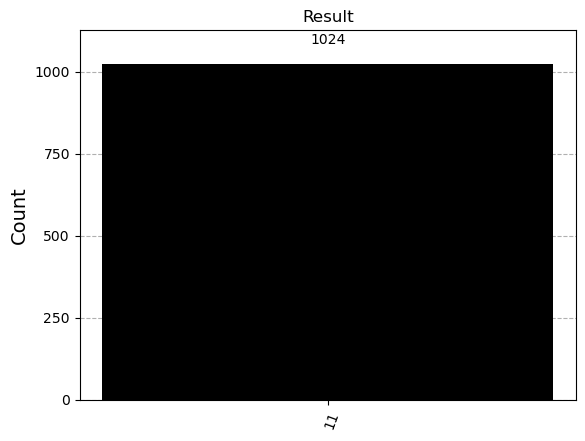

In [10]:
# Retrieve and plot the measurement results
plot_histogram(counts, color='black', title="Result")